In [149]:

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
for dirname, _, filenames in os.walk('E:\PythonFile\ HousePriceForecast\data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

E:\PythonFile\ HousePriceForecast\data\data_description - 副本.txt
E:\PythonFile\ HousePriceForecast\data\data_description.txt
E:\PythonFile\ HousePriceForecast\data\Predictions.csv
E:\PythonFile\ HousePriceForecast\data\sample_submission.csv
E:\PythonFile\ HousePriceForecast\data\submission.csv
E:\PythonFile\ HousePriceForecast\data\test.csv
E:\PythonFile\ HousePriceForecast\data\train.csv


In [150]:
data=pd.read_csv('E:/PythonFile/ HousePriceForecast/data/train.csv')
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [151]:
data[data.columns[data.isna().sum() > 0]].isna().mean()*100
#均值

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

去除掉一些明显有问题的数据

In [152]:
data.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature','Id'], inplace=True, axis=1)
data[data.columns[data.isna().sum() > 0]].isna().mean()*100

LotFrontage     17.739726
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64

In [153]:
x=data.drop('SalePrice', axis=1)
y=data['SalePrice']

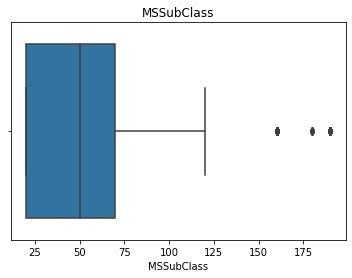

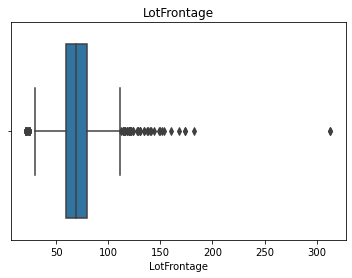

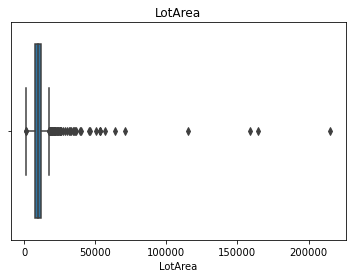

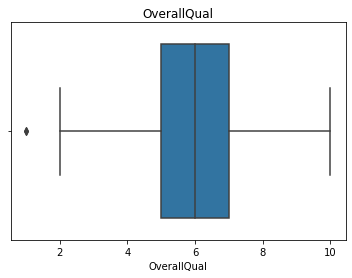

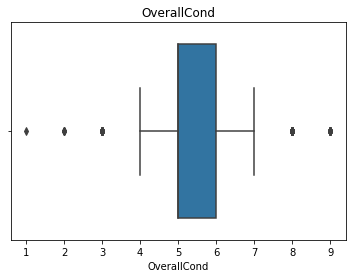

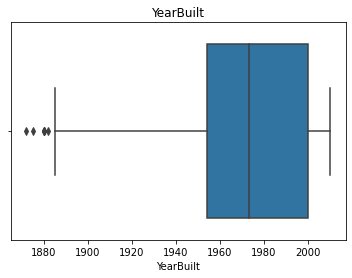

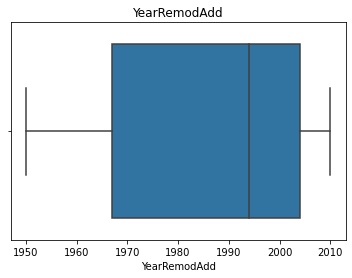

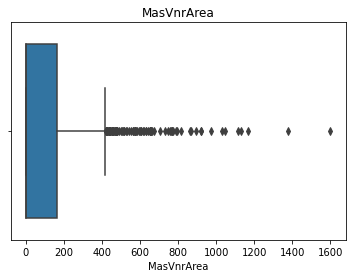

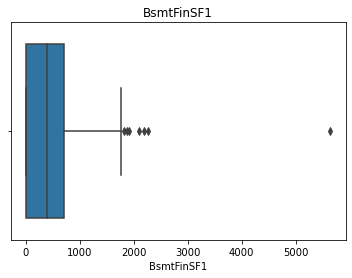

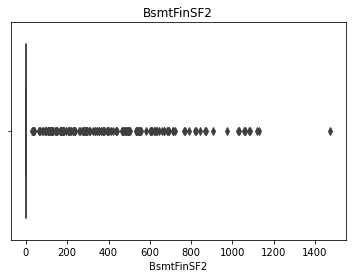

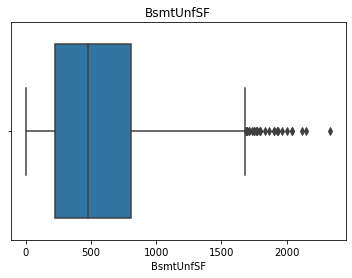

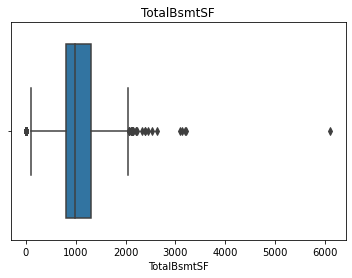

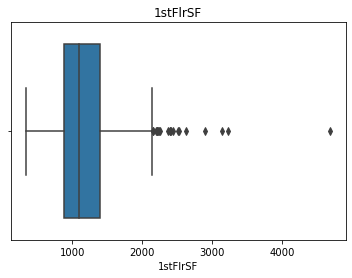

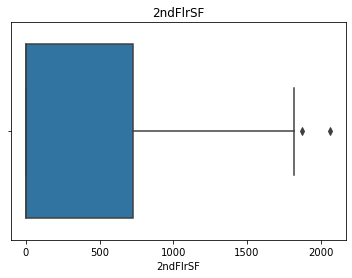

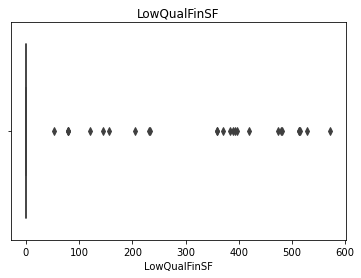

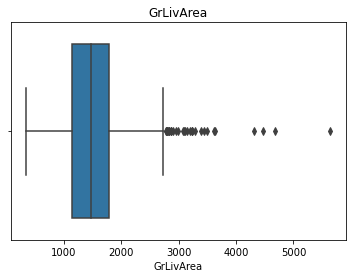

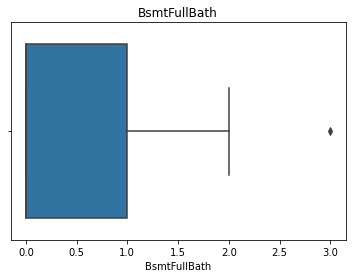

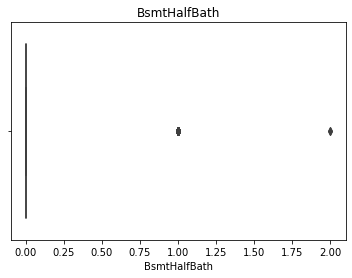

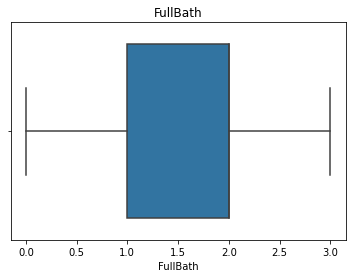

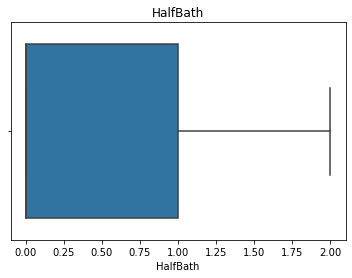

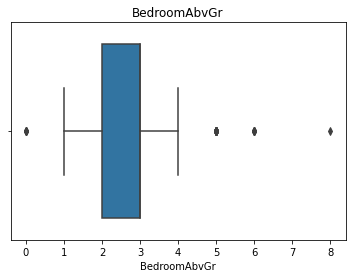

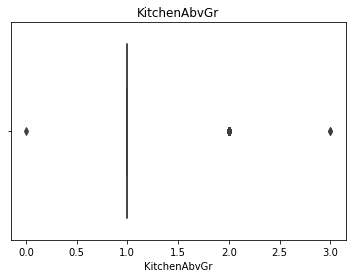

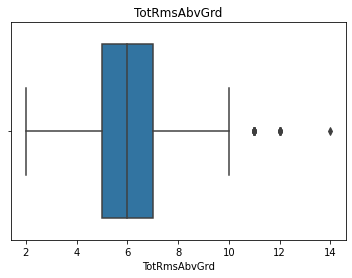

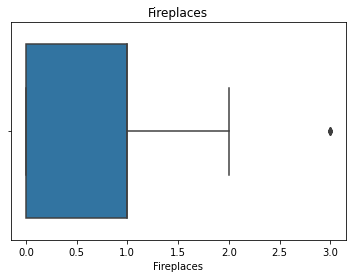

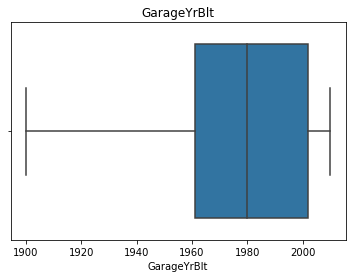

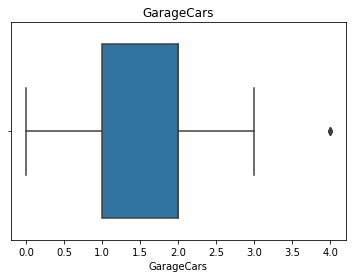

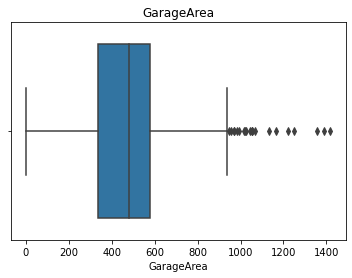

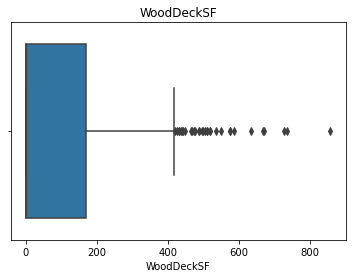

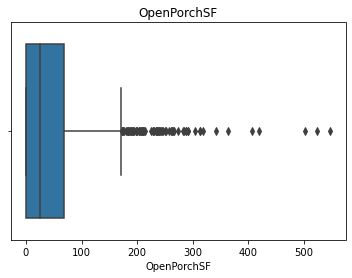

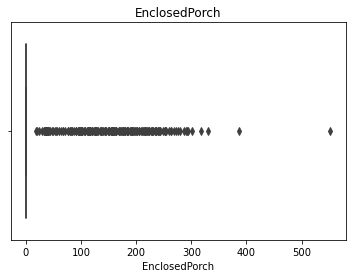

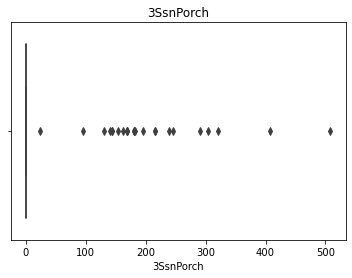

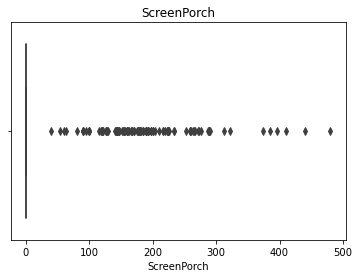

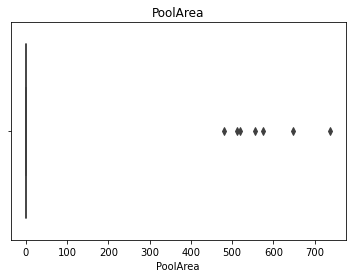

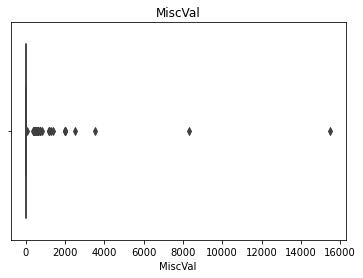

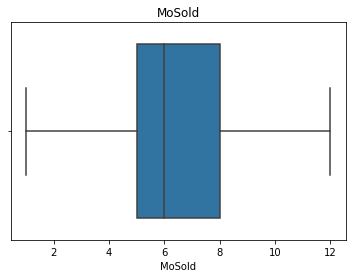

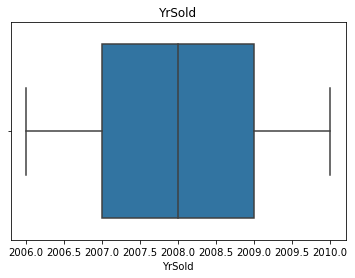

In [154]:
#画除了售价的箱型图
#异常值检测
for i in x.columns:
    if(x[i].dtype!='object'):
        sns.boxplot(x[i])
        plt.title(i)
        plt.show()

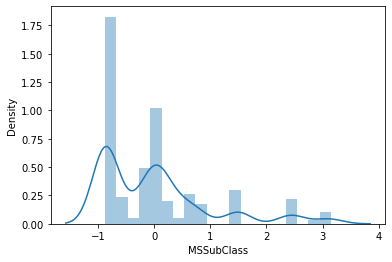

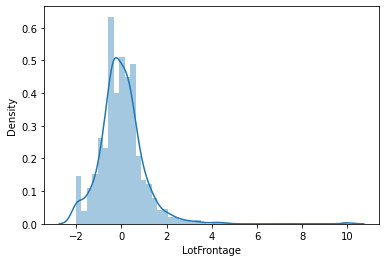

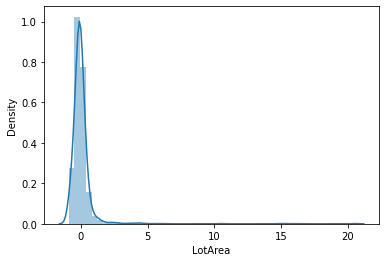

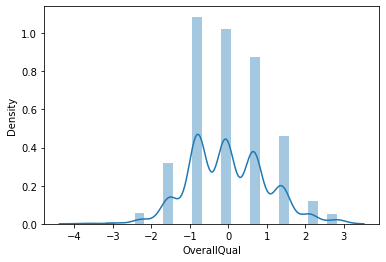

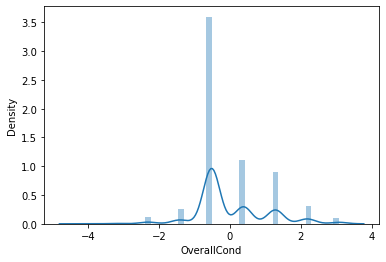

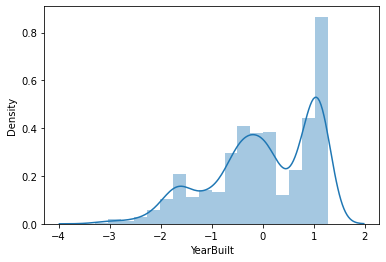

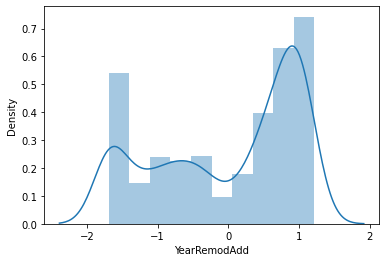

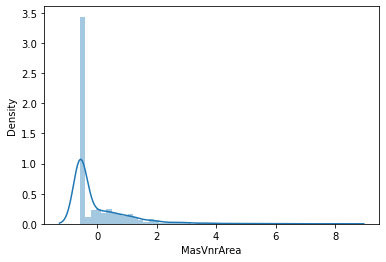

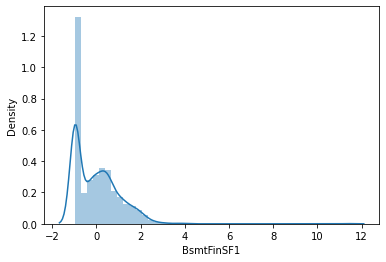

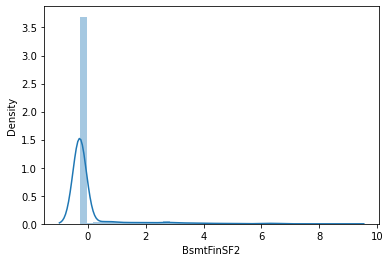

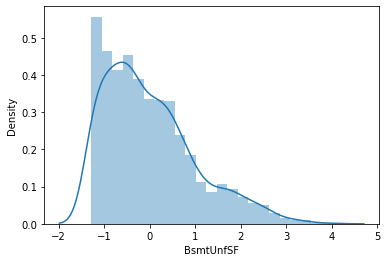

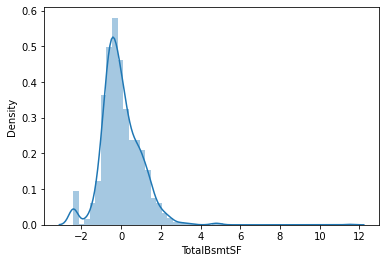

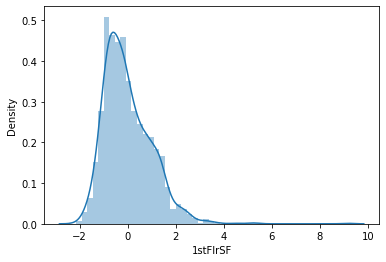

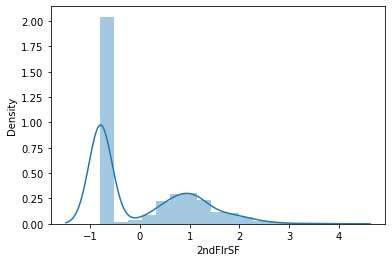

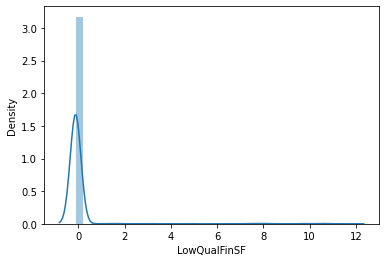

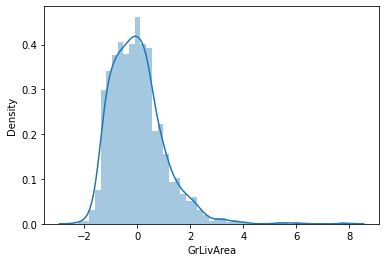

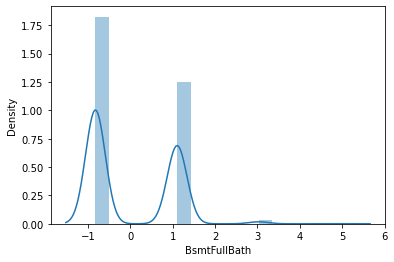

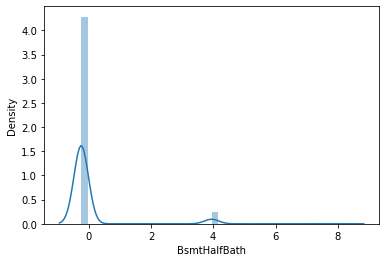

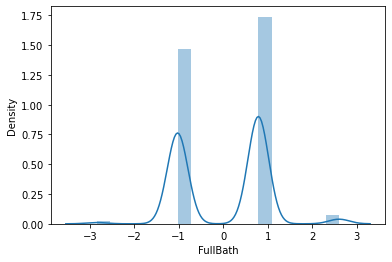

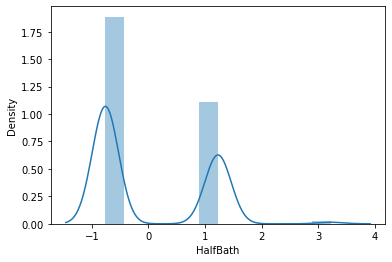

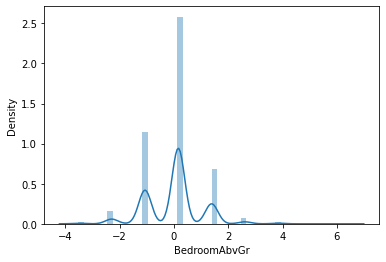

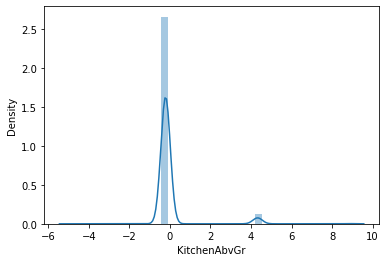

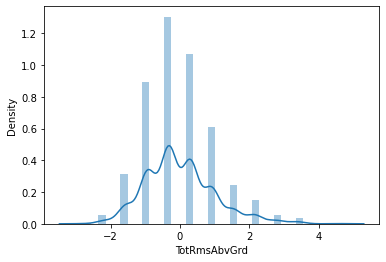

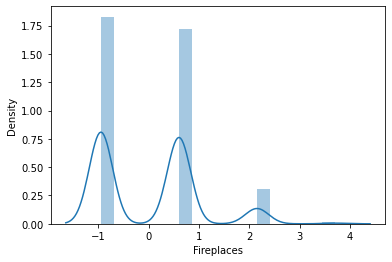

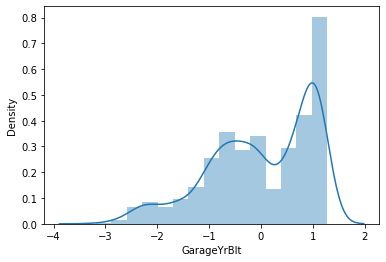

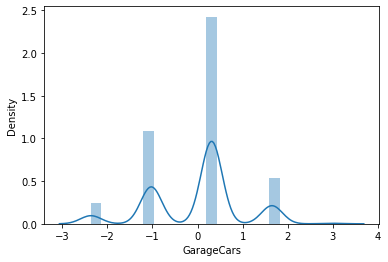

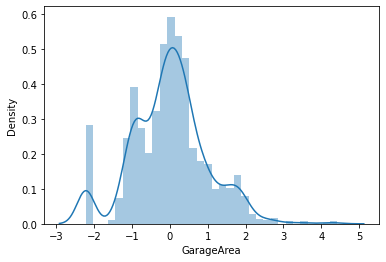

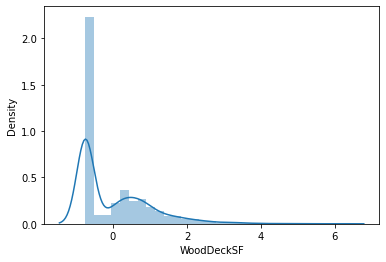

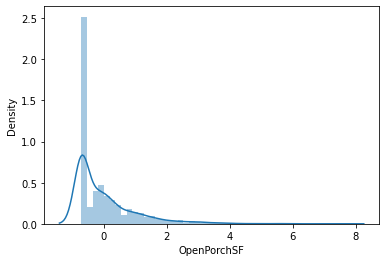

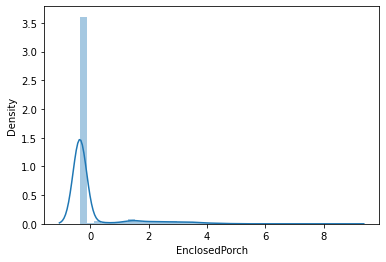

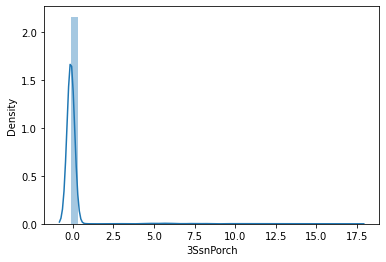

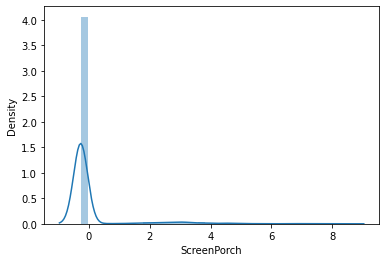

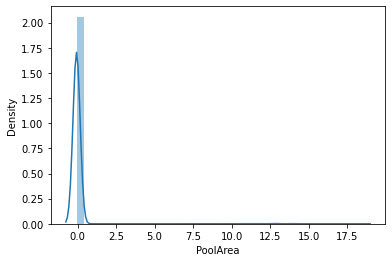

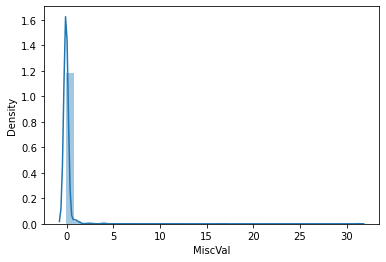

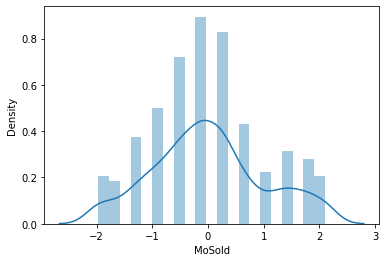

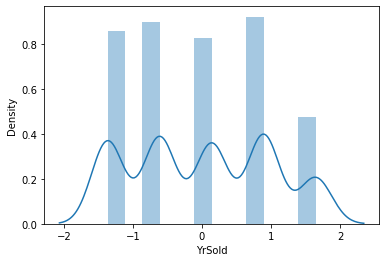

In [155]:
for i in x.columns:
    if(x[i].dtype!='object'):
        value_z=(x[i]-x[i].mean())/(x[i].std())
        sns.distplot(value_z)
        plt.show()

In [156]:
x['MSSubClass'][x['MSSubClass']>170]=170
x['LotFrontage'][x['LotFrontage']>190]=190
x['LotArea'][x['LotArea']>60000]=60000
x['OverallCond'][x['OverallCond']>8]=8
x['YearBuilt'][x['YearBuilt']<1879]=1879
x['MasVnrArea'][x['MasVnrArea']>1050]=1050
x['BsmtFinSF1'][x['BsmtFinSF1']>3000]=3000
x['BsmtUnfSF'][x['BsmtUnfSF']>2200]=2200
x['TotalBsmtSF'][x['TotalBsmtSF']>4000]=4000
x['1stFlrSF'][x['1stFlrSF']>3000]=3000
x['GrLivArea'][x['GrLivArea']>4100]=4100
x['BsmtFullBath'][x['BsmtFullBath']>2.5]=2.5
x['GarageArea'][x['GarageArea']>1300]=1300
x['WoodDeckSF'][x['WoodDeckSF']>650]=650
x['OpenPorchSF'][x['OpenPorchSF']>400]=400

In [157]:
x[x.columns[x.isna().sum() > 0]]

,LotFrontage,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,65.0,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,2003.0,RFn,TA,TA
1,80.0,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,1976.0,RFn,TA,TA
2,68.0,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,2001.0,RFn,TA,TA
3,60.0,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,1998.0,Unf,TA,TA
4,84.0,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,2000.0,RFn,TA,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,None,0.0,Gd,TA,No,Unf,Unf,SBrkr,Attchd,1999.0,RFn,TA,TA
1456,85.0,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,Attchd,1978.0,Unf,TA,TA
1457,66.0,None,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Attchd,1941.0,RFn,TA,TA
1458,68.0,None,0.0,TA,TA,Mn,GLQ,Rec,FuseA,Attchd,1950.0,Unf,TA,TA


array([[<AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>],
       [<AxesSubplot:title={'center':'GarageYrBlt'}>, <AxesSubplot:>]],
      dtype=object)

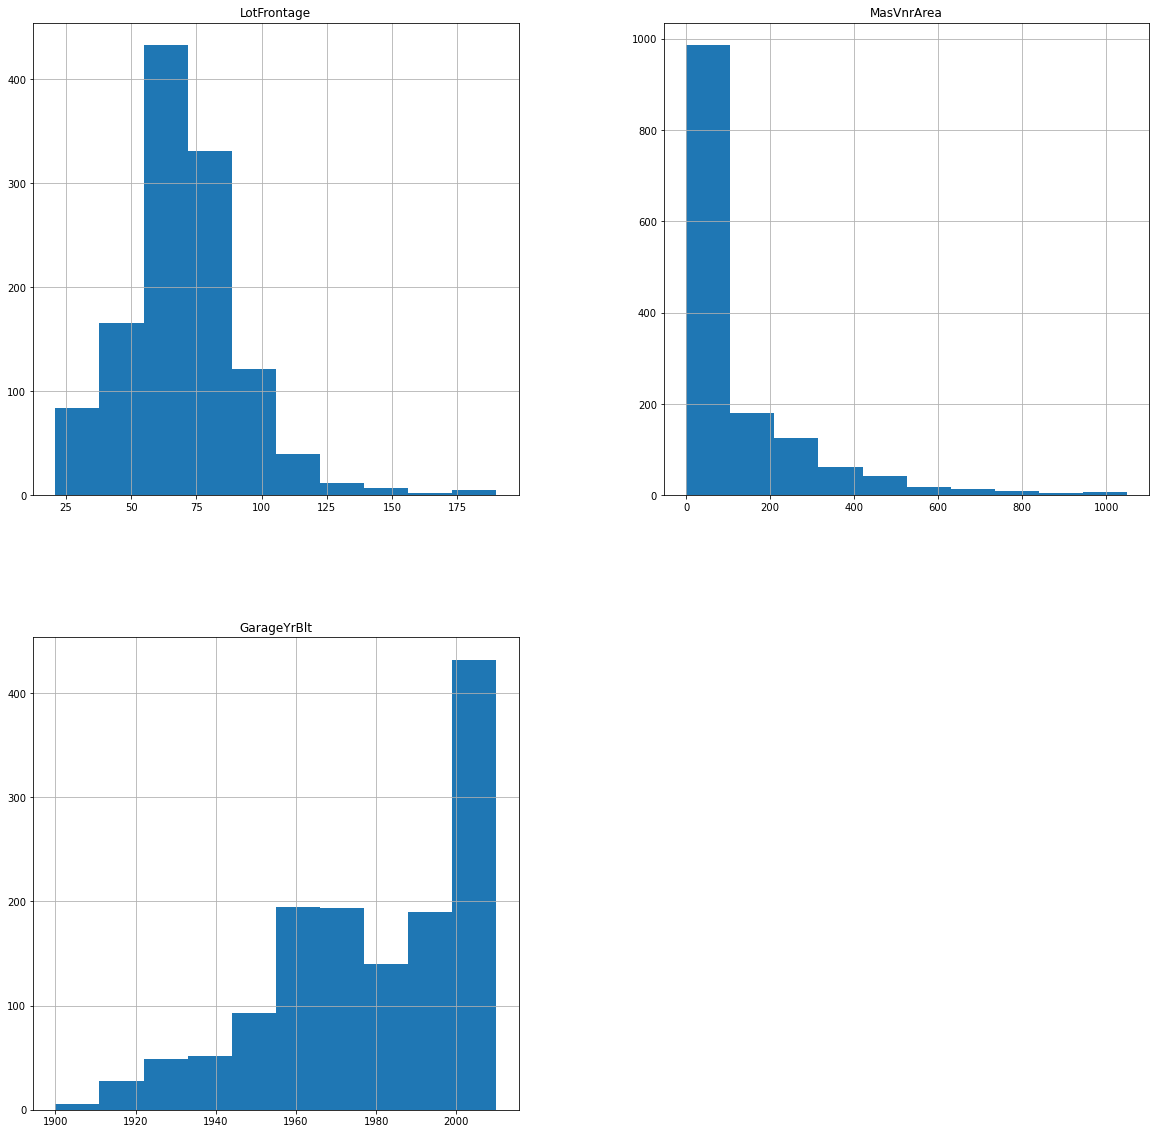

In [158]:
x[x.columns[x.isna().sum() > 0]].hist(figsize=(20,20))

In [159]:
numerical=['LotFrontage','MasVnrArea','GarageYrBlt']
# LotFrontage 物业与街道相邻的距离
#MasVnrArea  墙砖的面积
#GarageYrBlt 车库是那一年建成的

for i in numerical:
    #使用中位数进行添加
    x[i]=x[i].fillna(x[i].median())
    
categorical=['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageFinish','GarageQual','GarageCond']
for i in categorical:
    #使用众数进行添加
    x[i]=x[i].fillna(x[i].mode()[0])
x[x.columns[x.isna().sum() > 0]].isna().mean()*100

Series([], dtype: float64)

In [160]:
#虚拟编码
x_en=pd.get_dummies(x,drop_first=True)
x_en.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1.0,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

In [161]:
#数据归一化，将值进行放缩
mm_scaler=MinMaxScaler()
x_scaled=pd.DataFrame(mm_scaler.fit_transform(x_en), columns=x_en.columns)
x_scaled.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.266667,0.260355,0.121806,0.666667,0.571429,0.946565,0.883333,0.186667,0.235333,0.0,0.068182,0.21400,0.195799,0.413559,0.0,0.365374,0.4,0.0,0.666667,0.5,0.375,0.333333,0.500000,0.000000,0.936364,0.50,0.421538,0.000000,0.1525,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,

In [162]:
#对房价的数据归一化，对房价进行放缩
target_scaler=MinMaxScaler()
y_data=pd.DataFrame(y)
target_scaler.fit(y_data)
y_scaled=target_scaler.transform(y_data)
y_scaled

array([[0.24107763],
       [0.20358284],
       [0.26190807],
       ...,
       [0.321622  ],
       [0.14890293],
       [0.15636717]])

特征选择

In [163]:
#实例化决策树
dtr=DecisionTreeRegressor()
dtr.fit(x_scaled,y_scaled)
#递归特征消除（RFE）
rfe=RFE(dtr,15)
rfe=rfe.fit(x_scaled,y_scaled)

In [164]:
x_scaled.columns[rfe.support_]

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'GarageCars', 'GarageArea', 'MoSold', 'CentralAir_Y'],
      dtype='object')

In [165]:
selected_list=['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'MoSold', 'CentralAir_Y']
x_selected=x_scaled[selected_list]
x_selected.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,GarageArea,MoSold,CentralAir_Y
0,0.260355,0.121806,0.666667,0.946565,0.883333,0.235333,0.21400,0.195799,0.413559,0.365374,0.500000,0.50,0.421538,0.090909,1.0
1,0.349112,0.141397,0.555556,0.740458,0.433333,0.326000,0.31550,0.348087,0.000000,0.246415,0.333333,0.50,0.353846,0.363636,1.0
2,0.278107,0.169506,0.666667,0.931298,0.866667,0.162000,0.23000,0.219805,0.419370,0.385555,0.333333,0.50,0.467692,0.727273,1.0
3,0.230769,0.140545,0.666667,0.274809,0.333333,0.072000,0.18900,0.235184,0.366102,0.367233,0.416667,0.75,0.493846,0.090909,1.0
4,0.372781,0.220784,0.777778,0.923664,0.833333,0.218333,0.28625,0.304201,0.509927,0.494955,0.583333,0.75,0.643077,1.000000,1.0


计算VIF（方差膨胀系数）是衡量多元线性回归模型中复 (多重)共线性严重程度的一种度量。它表示回归系数估计量的方差与假设自变量间不线性相关时方差相比的比值。方差膨胀系数VIF越大，说明自变量之间存在共线性的可能性越大。一般来讲，如果方差膨胀因子超过10，则回归模型存在严重的多重共线性。又根据Hair(1995)的共线性诊断标准，当自变量的容忍度大于0.1，方差膨胀系数小于10的范围是可以接受的，表明自变量之间没有共线性问题存在

In [166]:
def checkVIF(x):
    vif=pd.DataFrame()
    vif['features']=x.columns
    vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['VIF']=round(vif['VIF'],3)
    vif=vif.sort_values(by="VIF",ascending=False)
    print(vif)

In [167]:
checkVIF(x_selected)

        features      VIF
9      GrLivArea  672.379
7       1stFlrSF  340.530
8       2ndFlrSF  123.352
2    OverallQual   37.785
11    GarageCars   34.953
12    GarageArea   29.628
10  TotRmsAbvGrd   26.959
6    TotalBsmtSF   26.392
3      YearBuilt   22.816
14  CentralAir_Y   14.371
0    LotFrontage    8.699
4   YearRemodAdd    6.544
13        MoSold    4.471
1        LotArea    4.404
5     BsmtFinSF1    2.829


In [168]:
#线性回归的拟合回归分析
#
def tableOLS(x,y):
    xc=sm.add_constant(x)
    lm=sm.OLS(y,xc).fit()
    print(lm.summary())

In [169]:
tableOLS(x_selected,y_scaled)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     404.6
Date:                Tue, 14 Dec 2021   Prob (F-statistic):               0.00
Time:                        18:18:04   Log-Likelihood:                 2351.1
No. Observations:                1460   AIC:                            -4670.
Df Residuals:                    1444   BIC:                            -4586.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1424      0.008    -18.953   

In [170]:
x_selected.drop(['GrLivArea','TotRmsAbvGrd','GarageArea','MoSold','CentralAir_Y'],inplace=True,axis=1)
tableOLS(x_selected,y_scaled)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     608.1
Date:                Tue, 14 Dec 2021   Prob (F-statistic):               0.00
Time:                        18:18:04   Log-Likelihood:                 2350.2
No. Observations:                1460   AIC:                            -4678.
Df Residuals:                    1449   BIC:                            -4620.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1461      0.006    -25.938   

In [171]:
checkVIF(x_selected)

       features     VIF
2   OverallQual  33.784
6   TotalBsmtSF  26.282
7      1stFlrSF  20.444
3     YearBuilt  19.621
9    GarageCars  12.520
0   LotFrontage   8.084
4  YearRemodAdd   6.454
1       LotArea   4.358
5    BsmtFinSF1   2.716
8      2ndFlrSF   2.593


In [172]:
x_selected.drop(['OverallQual','TotalBsmtSF'],inplace=True,axis=1)
checkVIF(x_selected)

       features     VIF
2     YearBuilt  14.207
7    GarageCars  12.166
5      1stFlrSF  10.435
0   LotFrontage   7.885
3  YearRemodAdd   6.258
1       LotArea   4.335
4    BsmtFinSF1   2.545
6      2ndFlrSF   1.994


In [173]:
x_selected.drop('YearBuilt',inplace=True,axis=1)
checkVIF(x_selected)

       features     VIF
4      1stFlrSF  10.347
6    GarageCars   9.845
0   LotFrontage   7.422
2  YearRemodAdd   4.619
1       LotArea   4.312
3    BsmtFinSF1   2.493
5      2ndFlrSF   1.993


In [174]:
x_features=x_selected.columns
x_features

Index(['LotFrontage', 'LotArea', 'YearRemodAdd', 'BsmtFinSF1', '1stFlrSF',
       '2ndFlrSF', 'GarageCars'],
      dtype='object')

对模型进行交叉验证
1：交叉验证用于评估模型的预测性能，尤其是训练好的模型在新数据上的表现，可以在一定程度上减小过拟合。
2：还可以从有限的数据中获取尽可能多的有效信息。

In [175]:
#线性模型
kfold=KFold(n_splits=10, random_state=76, shuffle=True)
model_LR=LinearRegression()
scoring='neg_mean_squared_error'
results_LR=cross_val_score(model_LR,x_selected, y_scaled, cv=kfold, scoring=scoring)
print(results_LR.mean())

-0.0032251128191961133


In [176]:
#岭回归模型
model_Ridge=Ridge()
results_Ridge=cross_val_score(model_Ridge,x_selected, y_scaled, cv=kfold, scoring=scoring)
print(results_Ridge.mean())

-0.003225024998386954


In [177]:
#拉索模型
model_Lasso=Lasso()
results_Lasso=cross_val_score(model_Lasso,x_selected, y_scaled, cv=kfold, scoring=scoring)
print(results_Lasso.mean())

-0.01217537935711992


In [178]:
#ElasticNet模型
model_EN=ElasticNet()
results_EN=cross_val_score(model_EN,x_selected, y_scaled, cv=kfold, scoring=scoring)
print(results_EN.mean())

-0.01217537935711992


In [179]:
#支持向量机模型
model_SVR=SVR()
params_svr=dict(kernel=['rbf'],
               gamma=[0.6,0.4,0.5],
               C=[13,14,15,16,17,18])
grid_svm=GridSearchCV(estimator=model_SVR, param_grid=params_svr, scoring=scoring, cv=kfold, n_jobs=-1)
grid_svm.fit(x_selected, y_scaled)
print("Best Score: %f use parameters: %s" % (grid_svm.best_score_, grid_svm.best_params_))

Best Score: -0.003164 use parameters: {'C': 13, 'gamma': 0.4, 'kernel': 'rbf'}


In [180]:
#基于Bagging的随机森林（Random Forest）是决策树集合
model_cart_bagging=DecisionTreeRegressor(max_depth=13)
model_bagging=BaggingRegressor(base_estimator=model_cart_bagging, n_estimators=10, random_state=76)
model_bagging.fit(x_selected, y_scaled)
y_pred_train=model_bagging.predict(x_selected)
error_bagging=mean_squared_error(y_scaled, y_pred_train)
error_bagging

0.0005365581390339155

In [181]:
#随机森林
model_randomforest=RandomForestRegressor()
params_rt=dict(max_depth=[7,8,9,10,11,12,13,14,15,16,18])
grid_rt=GridSearchCV(estimator=model_randomforest, param_grid=params_rt, scoring=scoring, cv=kfold, n_jobs=-1)
grid_rt.fit(x_selected, y_scaled)
print("Best Score: %f use parameters: %s" % (grid_rt.best_score_, grid_rt.best_params_))

Best Score: -0.002435 use parameters: {'max_depth': 16}


In [183]:
#对模型进行比较
model_name=['Linear Regression', 'Ridge', 'Lasso', 'Elastic Net', 'SVM', 'Bagging CART', 'Random Forest']
error_model=[abs(results_LR.mean()), abs(results_Ridge.mean()), abs(results_Lasso.mean()), abs(results_EN.mean()) ,
             abs(grid_svm.best_score_), abs(error_bagging), abs(grid_rt.best_score_)]

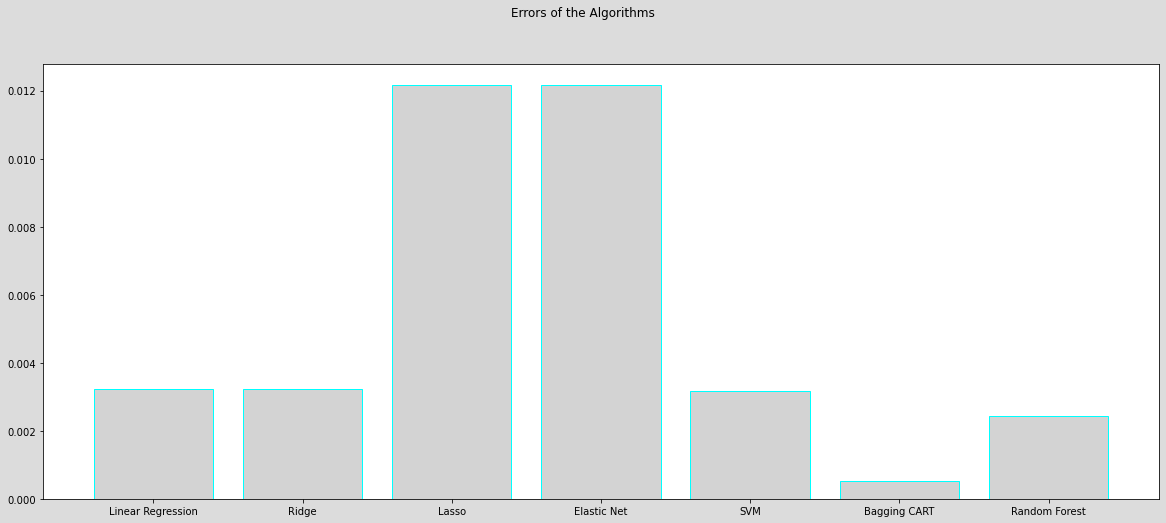

In [184]:
fig=plt.figure(figsize=(20,8),facecolor='gainsboro')
fig.suptitle('Errors of the Algorithms')
ax=fig.add_subplot(111)
plt.bar(x=model_name,height=error_model,color='lightgrey',edgecolor='cyan')
plt.show()

In [185]:
final_cart=DecisionTreeRegressor(max_depth=13) #决策树回归实例
final_model=BaggingRegressor(base_estimator=model_cart_bagging, n_estimators=10, random_state=76)
final_model.fit(x_selected, y_scaled)

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=13),
                 random_state=76)

In [186]:
test=pd.read_csv('E:/PythonFile/ HousePriceForecast/data/test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [187]:
Id_pred=test['Id']
test.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature','Id'], inplace=True, axis=1)
test_en=pd.get_dummies(test,drop_first=True)
test_en.shape

(1459, 216)

In [188]:
result_test= x_en.append(test_en, sort=False)
result_test.shape

(2919, 232)

In [189]:
test_en_2=result_test[1460:2919]
test_en_2.shape

(1459, 232)

In [190]:
test_en_2[test_en_2.columns[test_en_2.isna().sum() > 0]].isna().mean()*100

LotFrontage             15.558602
MasVnrArea               1.028101
BsmtFinSF1               0.068540
BsmtFinSF2               0.068540
BsmtUnfSF                0.068540
TotalBsmtSF              0.068540
BsmtFullBath             0.137080
BsmtHalfBath             0.137080
GarageYrBlt              5.346127
GarageCars               0.068540
GarageArea               0.068540
Utilities_NoSeWa       100.000000
Condition2_RRAe        100.000000
Condition2_RRAn        100.000000
Condition2_RRNn        100.000000
HouseStyle_2.5Fin      100.000000
RoofMatl_CompShg       100.000000
RoofMatl_Membran       100.000000
RoofMatl_Metal         100.000000
RoofMatl_Roll          100.000000
Exterior1st_ImStucc    100.000000
Exterior1st_Stone      100.000000
Exterior2nd_Other      100.000000
Heating_GasA           100.000000
Heating_OthW           100.000000
Electrical_Mix         100.000000
GarageQual_Fa          100.000000
dtype: float64

In [191]:
list_test=['Utilities_NoSeWa','Condition2_RRAe','Condition2_RRAn','Condition2_RRNn','HouseStyle_2.5Fin','RoofMatl_CompShg','RoofMatl_Membran','RoofMatl_Metal','RoofMatl_Roll','Exterior1st_ImStucc','Exterior1st_Stone','Exterior2nd_Other','Heating_GasA','Heating_OthW','Electrical_Mix','GarageQual_Fa']
for i in list_test:
    test_en_2[i]=test_en_2[i].fillna(0)
test_en_2[test_en_2.columns[test_en_2.isna().sum() > 0]].isna().mean()*100

LotFrontage     15.558602
MasVnrArea       1.028101
BsmtFinSF1       0.068540
BsmtFinSF2       0.068540
BsmtUnfSF        0.068540
TotalBsmtSF      0.068540
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
GarageYrBlt      5.346127
GarageCars       0.068540
GarageArea       0.068540
dtype: float64

In [192]:
numerical=['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageYrBlt','GarageCars','GarageArea']
for i in numerical:
    test_en_2[i]=test_en_2[i].fillna(test_en_2[i].median())
test_en_2[test_en_2.columns[test_en_2.isna().sum() > 0]].isna().mean()*100

Series([], dtype: float64)

In [193]:
test_scaled = pd.DataFrame(mm_scaler.transform(test_en_2), columns=test_en_2.columns)
test_scaled.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.000000,0.349112,0.175843,0.444444,0.714286,0.625954,0.183333,0.000000,0.156000,0.097693,0.122727,0.22050,0.210803,0.000000,0.0,0.149230,0.0,0.0,0.333333,0.0,0.250,0.333333,0.250000,0.000000,0.554545,0.25,0.561538,0.215385,0.000,0.0,0.0,0.25,0.0,0.000000,0.454545,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,

In [194]:
test_selected=test_scaled[x_features]
test_selected.head()

,LotFrontage,LotArea,YearRemodAdd,BsmtFinSF1,1stFlrSF,2ndFlrSF,GarageCars
0,0.349112,0.175843,0.183333,0.156000,0.210803,0.000000,0.25
1,0.355030,0.220903,0.133333,0.307667,0.373218,0.000000,0.25
2,0.313609,0.213458,0.800000,0.263667,0.222806,0.339467,0.50
3,0.337278,0.147836,0.800000,0.200667,0.222056,0.328329,0.50
4,0.130178,0.063118,0.700000,0.087667,0.354839,0.000000,0.50


In [195]:
ypred_scale=final_model.predict(test_selected)
ypred_scale=pd.DataFrame(ypred_scale)
ypred=target_scaler.inverse_transform(ypred_scale)
ypred

array([[128303.645     ],
       [153146.22093023],
       [190425.        ],
       ...,
       [196236.        ],
       [102450.        ],
       [268043.57142857]])

In [196]:
pred_data=pd.DataFrame(ypred,columns=['SalePrice'])
target_pred=pd.concat([Id_pred,pred_data],axis=1)
target_pred.head()

,Id,SalePrice
0,1461,128303.645000
1,1462,153146.220930
2,1463,190425.000000
3,1464,176044.233131
4,1465,172053.358526


In [197]:
target_pred

,Id,SalePrice
0,1461,128303.645000
1,1462,153146.220930
2,1463,190425.000000
3,1464,176044.233131
4,1465,172053.358526
...,...,...
1454,2915,80650.000000
1455,2916,88833.333333
1456,2917,196236.000000
1457,2918,102450.000000


In [198]:
target_pred.to_csv("E:/PythonFile/ HousePriceForecast/data/submission.csv", index=False)

In [1]:
import os
print(os.path.abspath(','))

C:\Users\eternalfireredlotus\,
